# Taller: Regresi√≥n Lineal M√∫ltiple para House Prices

**Generado:** 2025-10-17 23:33:34 UTC

Este notebook realiza un flujo completo (EDA ‚Üí limpieza ‚Üí codificaci√≥n ‚Üí selecci√≥n de variables ‚Üí entrenar `LinearRegression` ‚Üí evaluar ‚Üí predecir) y guarda el archivo `predicciones.csv`. Est√° hecho para ejecutarse en el entorno donde est√°n los archivos `train.csv` y `test.csv` (ya subidos a `/mnt/data`).

Se hicieron las visualizaciones de correlaci√≥n usando `matplotlib` para compatibilidad con las reglas del entorno.

In [1]:

# Imports principales
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Imports cargados')


Imports cargados


In [13]:

# Cargar datos (ajusta rutas si es necesario)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# Mostrar primeras filas
display(train.head(3))


Train shape: (1460, 81)
Test shape: (1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [14]:

# EDA b√°sico
print('--- Info ---')
display(train.info())
print('\n--- Descripci√≥n num√©rica ---')
display(train.describe().T)
print('\nValores nulos m√°s comunes:')
nulls = train.isnull().sum().sort_values(ascending=False)
display(nulls[nulls>0].head(20))


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  


None


--- Descripci√≥n num√©rica ---


count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T


Valores nulos m√°s comunes:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

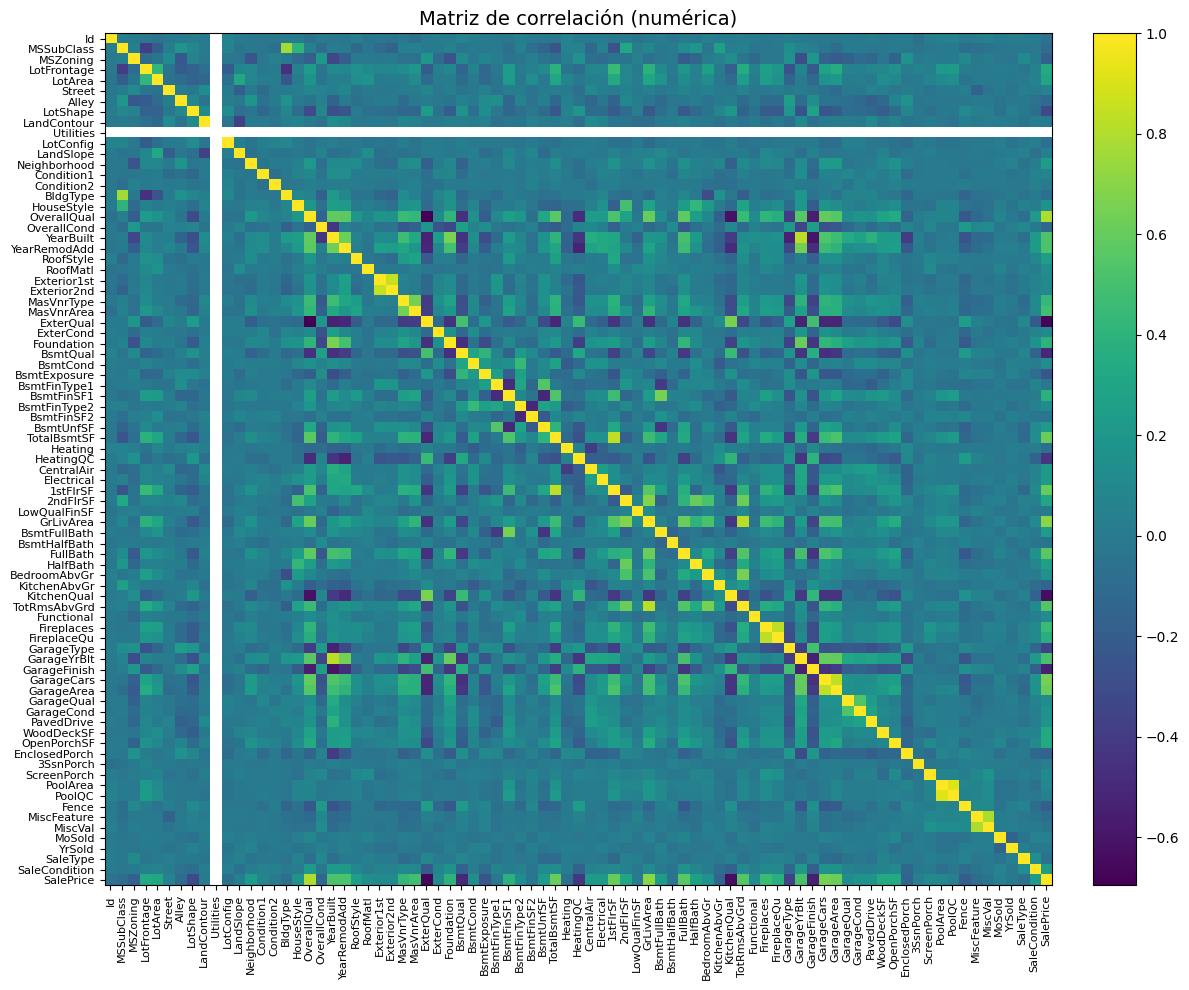

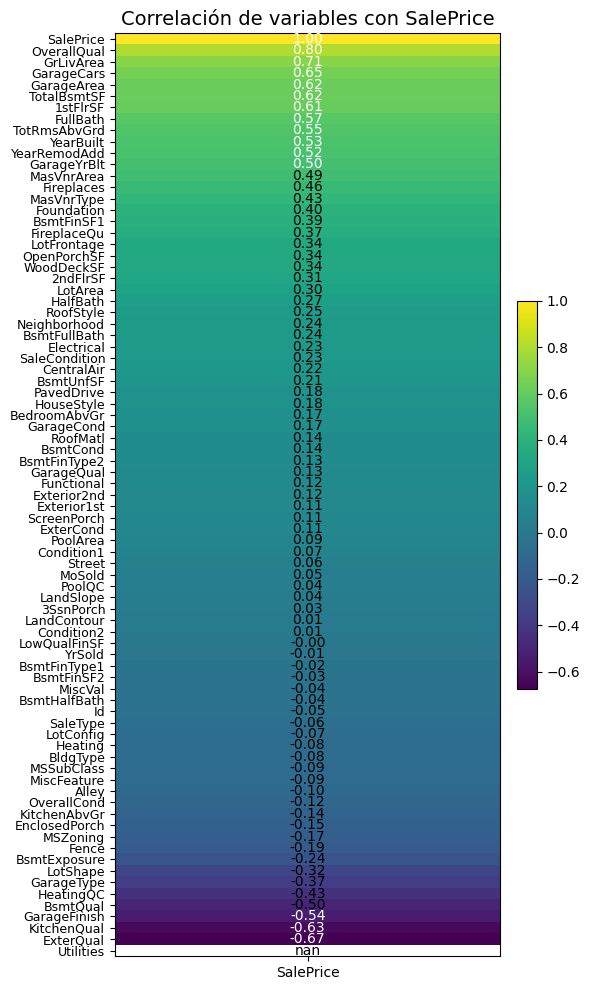

In [15]:

# Correlaci√≥n: preparar dataframe num√©rico (codificar categ√≥ricas a c√≥digos temporales para correlaci√≥n con target)
df_corr = train.copy()

# Convertir object/categorical a codes
for col in df_corr.columns:
    if df_corr[col].dtype == 'object' or str(df_corr[col].dtype).startswith('category'):
        df_corr[col] = df_corr[col].astype('category').cat.codes

df_corr = df_corr.select_dtypes(include=[np.number]).copy()
df_corr.dropna(inplace=True)

corr = df_corr.corr()

# Heatmap: correlaci√≥n completa (matplotlib)
plt.figure(figsize=(12,10))
im = plt.imshow(corr, aspect='auto', interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Matriz de correlaci√≥n (num√©rica)', fontsize=14)
# ticks
cols = corr.columns.tolist()
plt.xticks(range(len(cols)), cols, rotation=90, fontsize=8)
plt.yticks(range(len(cols)), cols, fontsize=8)
plt.tight_layout()
plt.show()

# Correlaci√≥n solo con SalePrice - ordenadas
if 'SalePrice' in corr.columns:
    corr_target = corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)
    plt.figure(figsize=(6,10))
    im = plt.imshow(corr_target, aspect='auto', interpolation='nearest')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title('Correlaci√≥n de variables con SalePrice', fontsize=14)
    plt.yticks(range(len(corr_target.index)), corr_target.index, fontsize=9)
    plt.xticks([0], ['SalePrice'])
    # Anotar valores
    for i, val in enumerate(corr_target['SalePrice']):
        plt.text(0, i, f"{val:.2f}", va='center', ha='center', color='white' if abs(val)>0.5 else 'black')
    plt.tight_layout()
    plt.show()
else:
    print('SalePrice no est√° en las columnas de correlaci√≥n.')


In [9]:

# Limpieza y tratamiento b√°sico (enfoque reproducible)
df = train.copy()

# 1) Eliminar columnas con demasiados nulos (umbral: > 80% nulos)
thresh = int(df.shape[0] * 0.2)
cols_before = df.shape[1]
df = df.dropna(axis=1, thresh=thresh)
cols_after = df.shape[1]
print(f'Columnas eliminadas por sparsity: {cols_before - cols_after}')

# 2) Imputar num√©ricos por mediana y categ√≥ricos por 'Missing'
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'SalePrice' in num_cols:
    num_cols.remove('SalePrice')  # target no lo imputamos
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')

if len(num_cols) > 0:
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
if len(cat_cols) > 0:
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print('\nNulos restantes (post-imputaci√≥n):', df.isnull().sum().sum())

# 3) Tratar outliers simples en GrLivArea y SalePrice - remover filas con GrLivArea extremo (percentil 99)
for col in ['GrLivArea', 'SalePrice']:
    if col in df.columns:
        upper = df[col].quantile(0.99)
        lower = df[col].quantile(0.01)
        before = df.shape[0]
        df = df[(df[col] <= upper) & (df[col] >= lower)]
        after = df.shape[0]
        print(f'Outliers removidos en {col}:', before - after)

print('\nShape despu√©s de limpieza b√°sica:', df.shape)


Columnas eliminadas por sparsity: 4

Nulos restantes (post-imputaci√≥n): 0
Outliers removidos en GrLivArea: 30
Outliers removidos en SalePrice: 30

Shape despu√©s de limpieza b√°sica: (1400, 77)


In [ ]:


working = df.copy()
tmp = working.copy()
for col in tmp.columns:
    if tmp[col].dtype == 'object' or str(tmp[col].dtype).startswith('category'):
        tmp[col] = tmp[col].astype('category').cat.codes

# Asegurarse de que SalePrice exista antes de correlacionar
if 'SalePrice' in tmp.columns:
    tmp = tmp.select_dtypes(include=[np.number]).dropna()
    corrs = tmp.corr()['SalePrice'].abs().sort_values(ascending=False)
    top_num = [col for col in corrs.index if col != 'SalePrice'][:20]
else:
    top_num = tmp.select_dtypes(include=[np.number]).columns.tolist()[:20]

print('Top num√©ricas seg√∫n correlaci√≥n con SalePrice:', top_num)

cat_cols = working.select_dtypes(include=['object', 'category']).columns.tolist()
if len(cat_cols) > 0:
    cat_card = {c: working[c].nunique() for c in cat_cols}
    top_cat = [k for k, v in sorted(cat_card.items(), key=lambda x: x[1])[:10]]
else:
    top_cat = []

print('Categor√≠as seleccionadas (por baja cardinalidad):', top_cat)

# Evitar duplicados en las columnas seleccionadas
features = list(dict.fromkeys([f for f in (top_num + top_cat) if f in working.columns]))
X = working[features].copy()
y = working['SalePrice'].copy()

print(f"Total de features seleccionadas: {len(features)}")

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

print(f"Columnas num√©ricas: {len(numeric_features)} | categ√≥ricas: {len(categorical_features)}")

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Compatibilidad con distintas versiones de scikit-learn
try:
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
except TypeError:
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('select', SelectKBest(score_func=f_regression, k=min(40, max(5, len(features)//2))))
])


X_processed = pipeline.fit_transform(X, y)
print('‚úÖ Transformaci√≥n completada con √©xito')
print('Forma final de X_processed:', X_processed.shape)


if X_processed.shape[1] == 0:
    print("‚ö†Ô∏è Atenci√≥n: no se seleccionaron variables num√©ricas √∫tiles. Revisa las correlaciones o reduce el umbral de selecci√≥n.")
else:
    print("‚úÖ Variables seleccionadas y transformadas correctamente listas para el modelo.")



Top num√©ricas seg√∫n correlaci√≥n con SalePrice: ['OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtQual', 'KitchenQual', '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageType', 'GarageFinish', 'Fireplaces', 'HeatingQC', 'MasVnrArea', 'Foundation']
Categor√≠as seleccionadas (por baja cardinalidad): ['Street', 'Utilities', 'CentralAir', 'LandSlope', 'PavedDrive', 'LotShape', 'LandContour', 'MasVnrType', 'ExterQual', 'KitchenQual']
Total de features seleccionadas: 28
Columnas num√©ricas: 13 | categ√≥ricas: 15
‚úÖ Transformaci√≥n completada con √©xito
Forma final de X_processed: (1400, 14)
‚úÖ Variables seleccionadas y transformadas correctamente listas para el modelo.


In [ ]:

# Entrenamiento: Regresi√≥n Lineal M√∫ltiple 
model = LinearRegression()

# Validaci√≥n cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mse = cross_val_score(model, X_processed, y, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = np.sqrt(-neg_mse)
mae_scores = -cross_val_score(model, X_processed, y, scoring='neg_mean_absolute_error', cv=kf)
r2_scores = cross_val_score(model, X_processed, y, scoring='r2', cv=kf)

print('CV RMSE: ', rmse_scores.mean(), '¬±', rmse_scores.std())
print('CV MAE:  ', mae_scores.mean(), '¬±', mae_scores.std())
print('CV R2:   ', r2_scores.mean(), '¬±', r2_scores.std())


model.fit(X_processed, y)
print('\nModelo entrenado sobre todo el set de entrenamiento.')


CV RMSE:  26542.82866875343 ¬± 1744.3006984414021
CV MAE:   19282.328273304847 ¬± 1136.0417088150646
CV R2:    0.8342870559318755 ¬± 0.013101498392982722

Modelo entrenado sobre todo el set de entrenamiento.


‚úÖ Conjunto de prueba listo: 1459 filas, 28 columnas
‚úÖ Imputaci√≥n de valores faltantes completada correctamente
‚úÖ Transformaci√≥n del test completada correctamente
Forma final del test procesado: (1459, 14)
‚úÖ Archivo 'predicciones.csv' guardado con √©xito en predicciones.csv


Id      SalePrice
0  1461  117514.029612
1  1462  165263.760384
2  1463  164506.274899
3  1464  184517.056775
4  1465  206389.431138
5  1466  170061.765447
6  1467  161342.034068
7  1468  162206.476980
8  1469  202435.772870
9  1470  107453.523979


üìä Estad√≠sticas b√°sicas de predicciones:


count      1459.000000
mean     177342.819246
std       69221.074203
min       18133.170292
25%      128050.973691
50%      164603.197143
75%      213244.943698
max      641542.463730
Name: SalePrice, dtype: float64

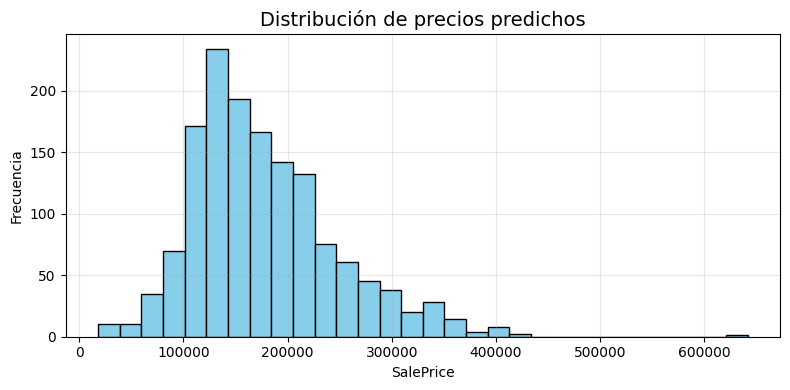

In [ ]:


from sklearn.exceptions import NotFittedError
from sklearn.impute import SimpleImputer


test_proc = test.copy()

try:
    _ = pipeline.named_steps['select']
except (AttributeError, NotFittedError):
    raise RuntimeError("‚ö†Ô∏è El pipeline no ha sido entrenado. Ejecuta las celdas de entrenamiento antes de esta.")


for col in features:
    if col not in test_proc.columns:
        print(f"‚ö†Ô∏è Columna faltante en test: {col} ‚Äî ser√° creada con NaN")
        test_proc[col] = np.nan


for c in categorical_features:
    if c not in test_proc.columns:
        print(f"‚ö†Ô∏è Columna categ√≥rica faltante en test: {c} ‚Äî ser√° creada con 'Missing'")
        test_proc[c] = 'Missing'


test_X = test_proc[features].copy()

print(f"‚úÖ Conjunto de prueba listo: {test_X.shape[0]} filas, {test_X.shape[1]} columnas")


num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Separar los tipos
num_cols = [c for c in test_X.columns if c in numeric_features]
cat_cols = [c for c in test_X.columns if c in categorical_features]

# Aplicar imputadores
if len(num_cols) > 0:
    test_X[num_cols] = num_imputer.fit_transform(test_X[num_cols])
if len(cat_cols) > 0:
    test_X[cat_cols] = cat_imputer.fit_transform(test_X[cat_cols])

print("‚úÖ Imputaci√≥n de valores faltantes completada correctamente")


X_test_processed = pipeline.transform(test_X)

print("‚úÖ Transformaci√≥n del test completada correctamente")
print('Forma final del test procesado:', X_test_processed.shape)


preds = model.predict(X_test_processed)


if 'Id' in test.columns:
    submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': preds})
else:
    submission = pd.DataFrame({'SalePrice': preds})


submission.to_csv('predicciones.csv', index=False)
print("‚úÖ Archivo 'predicciones.csv' guardado con √©xito en predicciones.csv")


display(submission.head(10))
print("\nüìä Estad√≠sticas b√°sicas de predicciones:")
display(submission['SalePrice'].describe())


plt.figure(figsize=(8,4))
plt.hist(submission['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuci√≥n de precios predichos', fontsize=14)
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


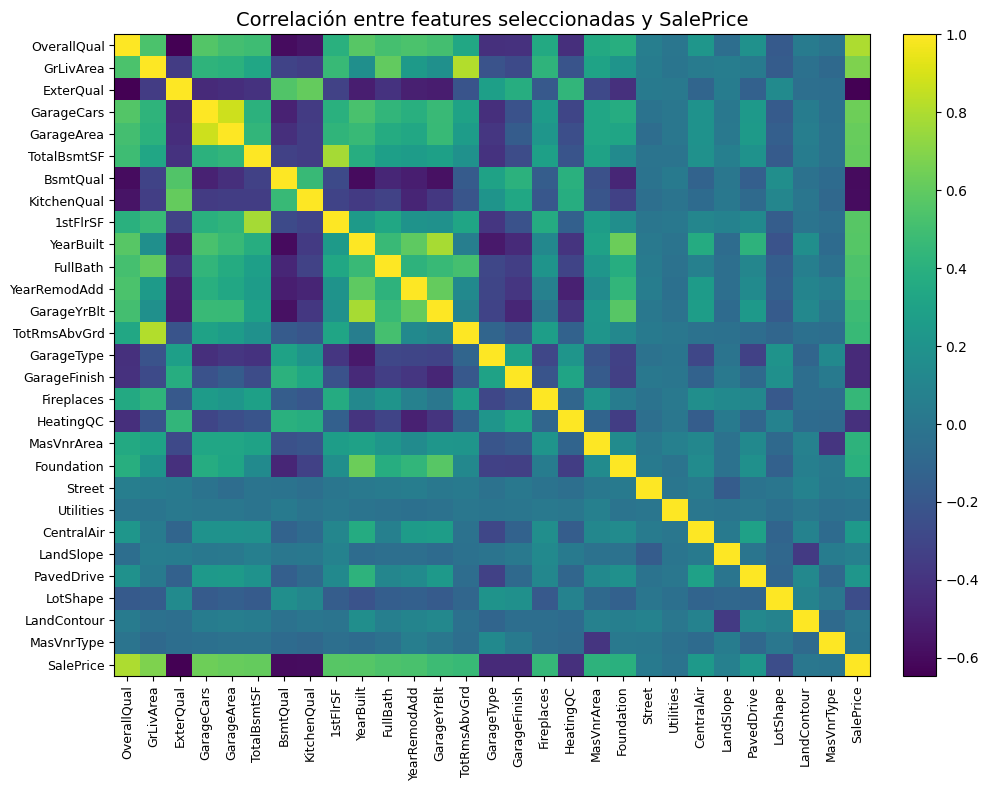


Correlaci√≥n con SalePrice (ordenada):


SalePrice       1.000000
OverallQual     0.794662
GrLivArea       0.679771
GarageCars      0.634851
GarageArea      0.616779
TotalBsmtSF     0.613149
1stFlrSF        0.575542
YearBuilt       0.563124
FullBath        0.538079
YearRemodAdd    0.527127
GarageYrBlt     0.483859
TotRmsAbvGrd    0.460851
Fireplaces      0.451418
MasVnrArea      0.415098
Foundation      0.398662
CentralAir      0.238030
PavedDrive      0.220783
LandSlope       0.073443
Street          0.029723
LandContour     0.007311
MasVnrType     -0.004269
Utilities      -0.016348
LotShape       -0.259175
HeatingQC      -0.418443
GarageFinish   -0.451530
GarageType     -0.452703
KitchenQual    -0.592295
BsmtQual       -0.596133
ExterQual      -0.644857
Name: SalePrice, dtype: float64

In [25]:

# Heatmap de correlaci√≥n entre las features seleccionadas y SalePrice (si SalePrice estaba en df)
sel_df = working[features + ['SalePrice']].copy()
for col in sel_df.columns:
    if sel_df[col].dtype == 'object' or str(sel_df[col].dtype).startswith('category'):
        sel_df[col] = sel_df[col].astype('category').cat.codes
sel_df = sel_df.dropna()

corr_sel = sel_df.corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr_sel, aspect='auto', interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Correlaci√≥n entre features seleccionadas y SalePrice', fontsize=14)
cols = corr_sel.columns.tolist()
plt.xticks(range(len(cols)), cols, rotation=90, fontsize=9)
plt.yticks(range(len(cols)), cols, fontsize=9)
plt.tight_layout()
plt.show()

# Mostrar correlaci√≥n con SalePrice ordenada
if 'SalePrice' in corr_sel.columns:
    corr_with_target = corr_sel['SalePrice'].sort_values(ascending=False)
    print('\nCorrelaci√≥n con SalePrice (ordenada):')
    display(corr_with_target)
